In [45]:
import psopy
import tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import ACOframework as af
import random

problem = tsplib95.load_problem('dsj1000-small.tsp')
# print(list(problem.get_nodes()))

In [46]:
list(problem.get_edges())[:5]

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]

In [47]:
graph = problem.get_graph()

/usr/local/lib/python3.7/dist-packages/networkx-2.1-py3.7.egg/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


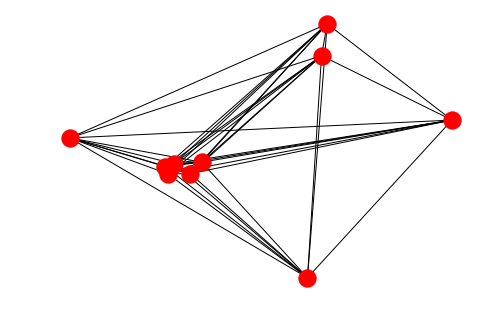

In [48]:
nx.draw(graph)

## Ant Colony Optimization

In [49]:
class TSPInstance():
    def __init__(self, n):
        self.n = n

        self.xcoord = [random.random()*100 for v in range(n)]
        self.ycoord = [random.random()*100 for v in range(n)]

    def getNumVertices(self):
        return self.n

    def getWeight(self, u, v):
        return ((self.xcoord[u]-self.xcoord[v])**2 + (self.ycoord[u]-self.ycoord[v])**2)**(1/2)

In [50]:
class TSPAnt(af.ACS_Ant):
    def __init__(self, instance, **kwargs):
        self.instance = instance

        super().__init__(**kwargs)

    def getComponentCost(self, component):
        return self.instance.getWeight(*component)

    def constructSolution(self):
        # set of all vertices
        V = set(range(self.instance.getNumVertices()))

        # initial vertex - last added vertex
        u = 0

        # vertices in the solution
        U = set([u])

        while U != V:
            # the available components at the current iteration
            # are (u, v) where u is the last added vertex
            # and v is a vertex that has not been added
            components = [(u, v) for v in V - U]

            # select a component and update u
            _, u = self.makeDecision(components)

            U.add(u)

        # add last edge
        self.makeDecision([(u, 0)])

In [56]:
instance = TSPInstance(5)
obj, components = af.Solve(antCls = TSPAnt, instance = instance, numIterations = 1000, numAnts = 10, alpha = 1, beta = 1) 

In [57]:
print(obj)
print()
print(components)

252.36756706307497

[(1, 3), (3, 0), (2, 1), (0, 4), (4, 2)]


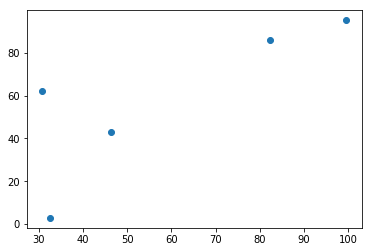

In [61]:
plt.scatter(instance.xcoord, instance.ycoord)

In [65]:
for path in components:
    print(path)
    print(instance.xcoord[path[0]])
    print(instance.ycoord[path[0]])
    

(1, 3)
99.55086611327995
95.0944557806071
(3, 0)
46.30095307419497
43.1782147471251
(2, 1)
82.3649923198071
85.84749912937507
(0, 4)
32.54457433652217
2.9112088477584175
(4, 2)
30.741776479088013
61.911501271572924


In [ ]:
G=nx.Graph(name="buba")
routes = [[2, 1, 4, 3, 11], [1, 0, 3, 11, 10], [10, 11, 3, 4, 1]]
edges = []
for r in routes:
    route_edges = [(r[n],r[n+1]) for n in range(len(r)-1)]
    G.add_nodes_from(r)
    G.add_edges_from(route_edges)
    edges.append(route_edges)

print("Graph has %d nodes with %d edges" %(G.number_of_nodes(),    
G.number_of_edges()))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos=pos)
nx.draw_networkx_labels(G,pos=pos)
colors = ['r', 'b', 'y']
linewidths = [20,10,5]
for ctr, edgelist in enumerate(edges):
    nx.draw_networkx_edges(G,pos=pos,edgelist=edgelist,edge_color = colors[ctr], width=linewidths[ctr])
plt.savefig('this.png')

Graph has 5 nodes with 5 edges


/usr/local/lib/python3.7/dist-packages/networkx-2.1-py3.7.egg/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


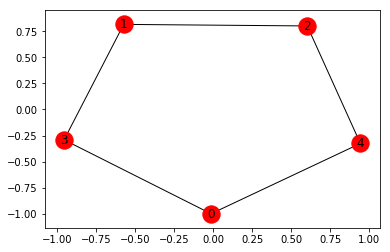

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G=nx.Graph(name="buba")
routes = [[0,1,2,3,4]]
edges = [(1, 3), (3, 0), (2, 1), (0, 4), (4, 2)]
for r in routes:
     G.add_nodes_from()
G.add_edges_from(edges)

print("Graph has %d nodes with %d edges" %(G.number_of_nodes(),    
G.number_of_edges()))
nx.draw_networkx(G,with_labels=True)
plt.savefig('this.png')
plt.show()